# Homework 1

Please modify the provided codes in this notebook and submit your file on the blackboard with the name:

**Number-FirstName-LastName-HW1-AMS161.ipynb**

Question 1: Part (f)
* Graph $f(x) = 1+x^2$ from $x=-1$ to $x=2$. 
* Compute $R_3$ and $R_6$
* Compute $L_3$ and $L_6$
* Compute $M_3$ and $M_6$

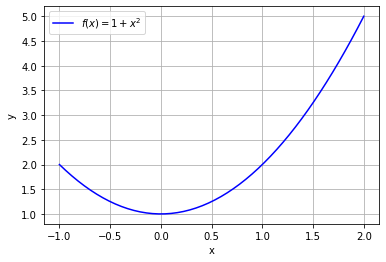

In [1]:
# Run the following code to get the graph of f
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 2, endpoint = True)
f = lambda x: 1 + x**2

plt.plot(x, f(x), 'b-', label = '$f(x)=1+x^2$')        # Plot with specified line and marker style
plt.xlabel('x')                # Add label to x-axis
plt.ylabel('y')                # Add label to y-axis
plt.grid(True)
plt.legend()
plt.show()                     # Show plot on screen

Our goal here is to approximate the exact area 
$$
A = \int^b_a f(x)\;dx = \lim_{n\to\infty}\sum^{n-1}_{i=0}f(x^*_i)\Delta x.
$$

In [2]:
# We calculate the exact area using the following code
import scipy.integrate as integrate
import scipy.special as special

A = integrate.quad(f, -1, 2)
A

(5.999999999999999, 6.661338147750938e-14)

In [3]:
# We next write a code to calculate the Riemann sum
def Riemann_sum(f, a, b, n, alpha):
    x = np.zeros(n+1,float) # Initialize the mesh points
    h = (b-a)/n             # Calculate the step size
    sum = 0                 # Initialize the Riemann Sum 
    for i in range(n+1):
        x[i] = a + i*h
    for i in range(n):
        sample = (1-alpha)*x[i] + alpha*x[i+1]
        sum += f(sample)
    return sum*h

In [4]:
# We next compute the estimates of A using R_n, L_n, M_n 
def Right(f, a, b, n):
    return Riemann_sum(f, a, b, n, alpha=1)
def Left(f, a, b, n):
    return Riemann_sum(f, a, b, n, alpha=0)
def Mid(f, a, b, n):
    return Riemann_sum(f, a, b, n, alpha=0.5)

# Define R_n, L_n, M_n
R = lambda n: Right(f, -1, 2, n)
L = lambda n: Left(f, -1, 2, n)
M = lambda n: Mid(f, -1, 2, n)


In [6]:
# Run the following code and compare the answers with your answers in parts (b), (c), (d)

print('The estimate of A using 3 rectangles and right endpoints is %.5f .' %R(3))
print('The estimate of A using 3 rectangles and left endpoints is %.5f .' %L(3))
print('The estimate of A using 3 rectangles and midpoints is %.5f .' %M(3))


The estimate of A using 3 rectangles and right endpoints is 8.00000 .
The estimate of A using 3 rectangles and left endpoints is 5.00000 .
The estimate of A using 3 rectangles and midpoints is 5.75000 .


Repeat the same previous code while replacing 3 by 6.

In [8]:
# Enter your code here
...

Make the table mentioned in question (1g) in HW1.

In [10]:
from pandas import DataFrame
from math import *

R_n = []
L_n = []
M_n = []
n = []

for index in (3, 6, 10, 20, 30, 50, 100, 200, 300, 400):
    n.append(index)
    R_n.append(R(index))
    L_n.append(L(index))
    M_n.append(M(index))
    
table1 = {'$n $': n, '$R_n$': R_n, '$L_n$': L_n, '$M_n$': M_n}
DataFrame(table1)

,$n $,$R_n$,$L_n$,$M_n$
0,3,8.000000,5.000000,5.750000
1,6,6.875000,5.375000,5.937500
2,10,6.495000,5.595000,5.977500
3,20,6.236250,5.786250,5.994375
4,30,6.155000,5.855000,5.997500
5,50,6.091800,5.911800,5.999100
6,100,6.045450,5.955450,5.999775
7,200,6.022612,5.977613,5.999944
8,300,6.015050,5.985050,5.999975
9,400,6.011278,5.988778,5.999986


## Question (1h)

We now plot $R_n, L_n$, and $M_n$ to see their behaviors. 

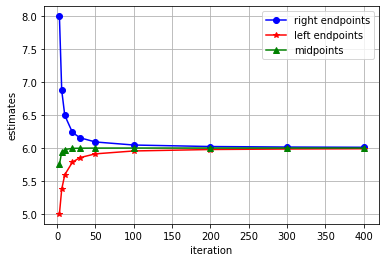

In [8]:
plt.plot(n, R_n, 'b-o', label = "right endpoints")
plt.plot(n, L_n, 'r-*', label = "left endpoints")
plt.plot(n, M_n, 'g-^', label = "midpoints")
plt.xlabel('iteration')
plt.ylabel('estimates')
plt.grid(True)
plt.legend()
plt.savefig('f1.png', format='png') # Save plot in png format for future use
plt.show()


## Question (1i)

This question is for 4 extra credits. 

In [11]:
R_n = []
L_n = []
M_n = []
n = []

for index in (3, 6, 10, 20, 30, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000):
    # Enter your code here
    ...

## Question (2b)

You don't need to modify the provided code in this question. Just run it and try to explain it for **4 extra credits**.

In [11]:
import time

# Input the necessary data

t = (0, 10, 15, 20, 32, 59, 62, 125)
v = (0, 185, 319, 447, 742, 1325, 1445, 4151)

Delta_t = []
Distance = []
for i in range(1, len(t)):
    Delta_t.append(t[i] - t[i-1])
    Distance.append(v[i]*(t[i] - t[i-1]))
print(Delta_t)
print(Distance)

Event = ('Launch', 'Begin roll maneuver', 'End roll maneuver', 
         'Throttle to 89%', 'Throttle to 67%', 'Throttle to 104%', 'Maximum dynamic pressure', 'Solid rocket booster separation')

print(Event)

[10, 5, 5, 12, 27, 3, 63]
[1850, 1595, 2235, 8904, 35775, 4335, 261513]
('Launch', 'Begin roll maneuver', 'End roll maneuver', 'Throttle to 89%', 'Throttle to 67%', 'Throttle to 104%', 'Maximum dynamic pressure', 'Solid rocket booster separation')


In [13]:
# Run the following code

n = len(Event)
d = np.zeros(n)
for i in range(n):
    # Calculate the accumulated distance 
    if i!= 0:
        d[i] = sum(Distance[0:i])
    # Print the following information
    print(Event[i] + ' at time t = %d (s),' %t[i] + ' with velocity v = %d (ft/s);' %v[i] + ' we are %d (ft)' %d[i] + ' above the earth surface.' )
    print('...................')
    time.sleep(3)


Launch at time t = 0 (s), with velocity v = 0 (ft/s); we are 0 (ft) above the earth surface.
...................
Begin roll maneuver at time t = 10 (s), with velocity v = 185 (ft/s); we are 1850 (ft) above the earth surface.
...................
End roll maneuver at time t = 15 (s), with velocity v = 319 (ft/s); we are 3445 (ft) above the earth surface.
...................
Throttle to 89% at time t = 20 (s), with velocity v = 447 (ft/s); we are 5680 (ft) above the earth surface.
...................
Throttle to 67% at time t = 32 (s), with velocity v = 742 (ft/s); we are 14584 (ft) above the earth surface.
...................
Throttle to 104% at time t = 59 (s), with velocity v = 1325 (ft/s); we are 50359 (ft) above the earth surface.
...................
Maximum dynamic pressure at time t = 62 (s), with velocity v = 1445 (ft/s); we are 54694 (ft) above the earth surface.
...................
Solid rocket booster separation at time t = 125 (s), with velocity v = 4151 (ft/s); we are 316207 

## Question 5

This question involves estimating the integral 
$$
A = \int^1_0(e^x + 1)\;dx 
$$
using $A_n = R_n, L_n, M_n$.

1. Write a function to compute $R_n$, $L_n$, and $M_n$.
2. Write a function to return the index $N$ such that $A_N$ is a good approximation to within the given **degree of accuracy $\epsilon$**. 

In [19]:
# Recall the Riemann Sum
def Riemann_sum(f, a, b, n, alpha):
    x = np.zeros(n+1,float) # Initialize the mesh points
    h = (b-a)/n             # Calculate the step size
    sum = 0                 # Initialize the Riemann Sum 
    for i in range(n+1):
        x[i] = a + i*h
    for i in range(n):
        sample = (1-alpha)*x[i] + alpha*x[i+1]
        sum += f(sample)
    return sum*h

In [20]:
# We next compute the estimates of A using R_n, L_n, M_n 
def Right(f, a, b, n):
    return Riemann_sum(f, a, b, n, alpha=1)
def Left(f, a, b, n):
    return Riemann_sum(f, a, b, n, alpha=0)
def Mid(f, a, b, n):
    return Riemann_sum(f, a, b, n, alpha=0.5)

# Input the function f
f = lambda x: np.exp(x) + 1

# Define R_n, L_n, M_n
R = lambda n: Right(f, 0, 1, n)
L = lambda n: Left(f, 0, 1, n)
M = lambda n: Mid(f, 0, 1, n)


We next try to calculuate some values of $R_n, L_n$, and $M_n$.

In [21]:
R_n = []
L_n = []
M_n = []
n = []

for index in (3, 6, 10, 20, 30, 50, 100, 200, 300, 400):
    n.append(index)
    R_n.append(R(index))
    L_n.append(L(index))
    M_n.append(M(index))
    
table2 = {'$n $': n, '$R_n$': R_n, '$L_n$': L_n, '$M_n$': M_n}
DataFrame(table2)

,$n $,$R_n$,$L_n$,$M_n$
0,3,3.020543,2.447782,2.710353
1,6,2.865448,2.579067,2.716295
2,10,2.805628,2.633799,2.717566
3,20,2.761597,2.675683,2.718103
4,30,2.747079,2.689803,2.718202
5,50,2.735522,2.701156,2.718253
6,100,2.726888,2.709705,2.718275
7,200,2.722581,2.713990,2.718280
8,300,2.721147,2.715420,2.718281
9,400,2.720431,2.716135,2.718281


It is a good idea to visualize the behavior of $R_n, L_n$, and $M_n$.

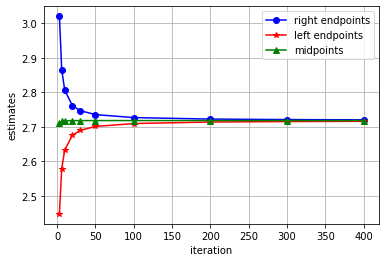

In [22]:
plt.plot(n, R_n, 'b-o', label = "right endpoints")
plt.plot(n, L_n, 'r-*', label = "left endpoints")
plt.plot(n, M_n, 'g-^', label = "midpoints")
plt.xlabel('iteration')
plt.ylabel('estimates')
plt.grid(True)
plt.legend()
plt.savefig('f4.png', format='png') # Save plot in png format for future use
plt.show()

We next write a function to return the index $N$ and $A_N$ such that $A_N$ is a good approximation to within the given **degree of accuracy $\epsilon$**. 

In [23]:
from math import *

# Write a function to return the index N and R_N such that R_N is a good estimate
def good_right_est(epsilon):
    N = 1
    while (abs(R(N) - R(N+1))) > epsilon: # If R_N is not a good estimate, increase N
        N = N + 1
    return N, R(N)

Running the following code will give us the index $N$ and $R_N$ such that $R_N$ is a good approximation to within $\epsilon = 0.01$.

In [24]:
GR = good_right_est(epsilon = 0.01)
print(GR)

(9, 2.8155093460652276)


It means we need 9 iterations in order to get a good approximation $A_9$ to within $\epsilon = 0.01$.

Repeat the same process with $A_n = L_n$ and $A_n = M_n$.

In [25]:
# Write a function to return the index N and L_N such that L_N is a good estimate
def good_left_est(epsilon):
    N = 1
    while (abs(L(N) - L(N+1))) > epsilon: # If L_N is not a good estimate, increase N
        N = N + 1
    return N, L(N)

# Write a function to return the index N and M_N such that M_N is a good estimate
def good_mid_est(epsilon):
    N = 1
    while (abs(M(N) - M(N+1))) > epsilon: # If M_N is not a good estimate, increase N
        N = N + 1
    return N, M(N)

In [26]:
GL = good_left_est(epsilon = 0.01)
GM = good_mid_est(epsilon = 0.01)
print(GL)
print(GM)

(9, 2.6245891429031123)
(2, 2.7005127166502083)


It means that $L_9$ and $M_2$ are good estimates of $A$ to within $\epsilon =0.01$.

For your information, the exact value $A = e = 2.718281828459045\ldots$.



## Your turn

You may not be happy with your estimates $R_9, L_9$, and $M_2$. To improve them, you decide to set the given **degree of accuracy $\epsilon$** as follows:
* $\epsilon = 0.001$
* $\epsilon = 0.0001$
* $\epsilon = 0.00001$
* $\epsilon = 0.000001$

In [27]:
GR = good_right_est(epsilon = 0.001)
GL = good_left_est(epsilon = 0.001)
GM = good_mid_est(epsilon = 0.001)

print(GR)
print(GL)
print(GM)

(29, 2.7480776356260033)
(29, 2.6888265380929335)
(5, 2.715421362995841)


**(4 pts)** Repeat the same code with $\epsilon = 0.0001$.

In [29]:
# Enter your code here
GR = good_right_est(epsilon = 0.000001)
GL = good_left_est(epsilon = 0.000001)
GM = good_mid_est(epsilon = 0.000001)

print(GR)
print(GL)
print(GM)

(927, 2.719208792191959)
(927, 2.717355197986502)
(52, 2.718255351275638)


**(4 pts)** Repeat the same code with $\epsilon = 0.00001$.

In [68]:
# Enter your code here
...

**(4 pts)** Repeat the same code with $\epsilon = 0.000001$.

In [69]:
# Enter your code here
...